Implementing an ANN architecture using tensorflow 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

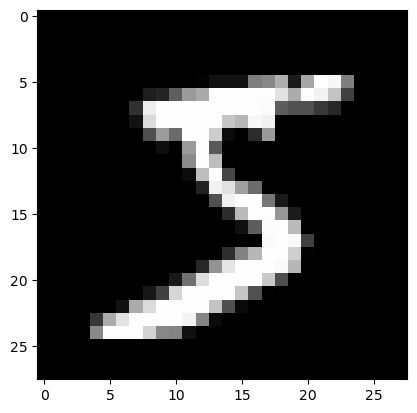

In [6]:
plt.imshow(X_train[0],cmap='grey')

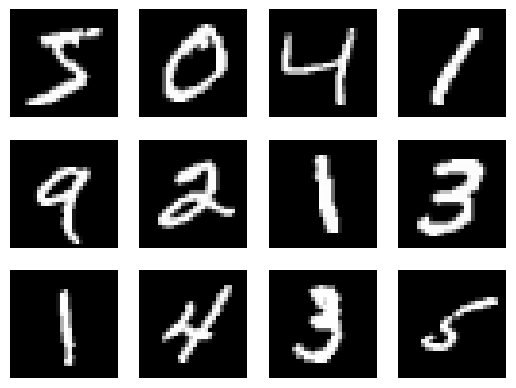

In [7]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i],cmap='grey')
    plt.axis('off')

In [8]:
# for scaling the data (b/w 0 to 1)
X_train, X_test = X_train/255, X_test/255

In [9]:
model = Sequential()

model.add(tf.keras.Input(shape=(28, 28)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Using Sparse categorical crossentropy. No need for OneHotEncoding in this loss function

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
# If Early Stopping is required, in model.fit, just use callbacks=....
#  callback = EarlyStopping(
 #   various parameters
#    )
 

In [13]:
start=time.time()

history = model.fit(X_train, y_train, epochs=13, validation_split=0.2)
print("Time Taken: ",time.time() - start)

Epoch 1/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8686 - loss: 0.4679 - val_accuracy: 0.9535 - val_loss: 0.1639
Epoch 2/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9611 - loss: 0.1351 - val_accuracy: 0.9640 - val_loss: 0.1195
Epoch 3/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9735 - loss: 0.0879 - val_accuracy: 0.9685 - val_loss: 0.1013
Epoch 4/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9812 - loss: 0.0630 - val_accuracy: 0.9723 - val_loss: 0.0948
Epoch 5/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9848 - loss: 0.0469 - val_accuracy: 0.9730 - val_loss: 0.0880
Epoch 6/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9891 - loss: 0.0349 - val_accuracy: 0.9743 - val_loss: 0.0895
Epoch 7/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9916 - loss: 0.0267 - val_accuracy: 0.9761 - val_loss: 0.0859
Epoch 8/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9946 - loss: 0

In [14]:
y_probab = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


### pred values will be in form of probability so we will use argmax() to get the predicted class

In [15]:
y_pred = y_probab.argmax(axis=1)
print(y_pred)
print(y_test)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [16]:
from sklearn.metrics import accuracy_score

print("Accuracy = ", accuracy_score(y_test, y_pred))

Accuracy =  0.9735


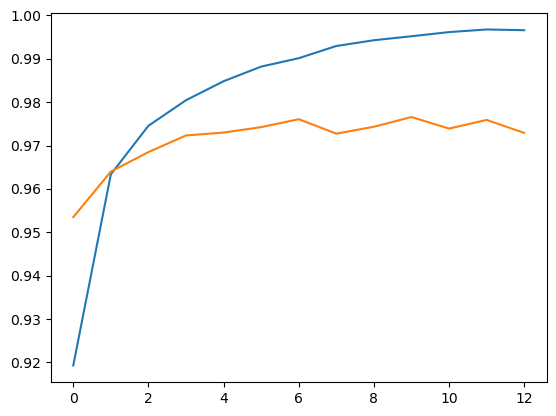

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

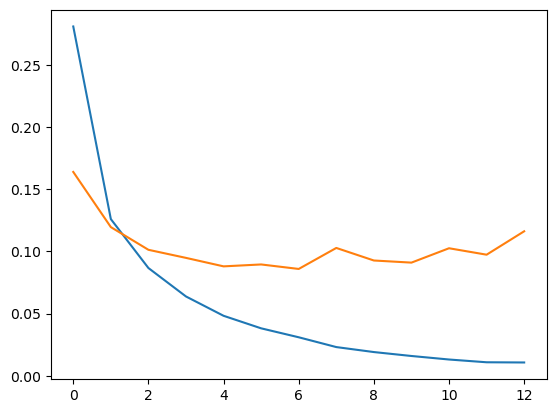

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

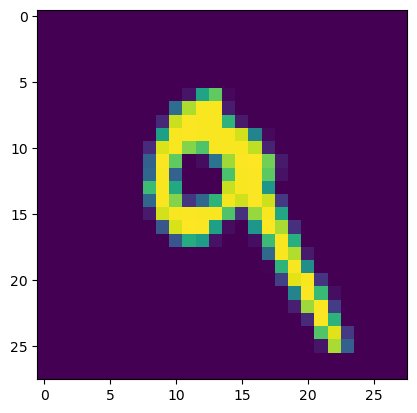

In [19]:
plt.imshow(X_test[7])

In [20]:
model.predict(X_test[7].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


array([9])

Noice